In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Covid19India.csv')
df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30.0,1.0,2020.0
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2.0,2.0,2020.0
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3.0,2.0,2020.0
3,3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2.0,3.0,2020.0
4,4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2.0,3.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...
430572,25617,NaN,01/12/2020,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.0,2020.0
430573,25618,NaN,01/12/2020,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.0,2020.0
430574,25619,NaN,01/12/2020,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.0,2020.0
430575,25620,NaN,01/12/2020,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.0,2020.0


In [ ]:
data = df.iloc[:,1:]
data

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30.0,1.0,2020.0
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2.0,2.0,2020.0
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3.0,2.0,2020.0
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2.0,3.0,2020.0
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2.0,3.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...
430572,NaN,01/12/2020,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.0,2020.0
430573,NaN,01/12/2020,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.0,2020.0
430574,NaN,01/12/2020,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.0,2020.0
430575,NaN,01/12/2020,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12.0,2020.0


# Inspect the data frame

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430577 entries, 0 to 430576
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Num Cases          430401 non-null  float64
 1   Date Announced     430570 non-null  object 
 2   Age Bracket        116788 non-null  object 
 3   Gender             119080 non-null  object 
 4   Detected City      14398 non-null   object 
 5   Detected District  418596 non-null  object 
 6   Detected State     430398 non-null  object 
 7   Current Status     430407 non-null  object 
 8   Day                430570 non-null  float64
 9   Month              430570 non-null  float64
 10  Year               430570 non-null  float64
dtypes: float64(4), object(7)
memory usage: 36.1+ MB


# Inspect null values in each column

In [ ]:
round(data.isnull().sum(axis=0).sort_values(ascending=False)/len(data)*100,2)

Detected City        96.66
Age Bracket          72.88
Gender               72.34
Detected District     2.78
Detected State        0.04
Num Cases             0.04
Current Status        0.04
Year                  0.00
Month                 0.00
Day                   0.00
Date Announced        0.00
dtype: float64

# inspect null values in each row

In [ ]:
data.isnull().sum(axis=1).sort_values(ascending=False)

404953    11
224898    11
404952    11
404954    11
271479    11
          ..
112861     0
112862     0
112863     0
112864     0
0          0
Length: 430577, dtype: int64

# total covid-19 cases month wise

In [ ]:
data.groupby('Month')['Num Cases'].sum()

Month
1.0           1.0
2.0           2.0
3.0        1635.0
4.0       36078.0
5.0      242853.0
6.0      663181.0
7.0     1878471.0
8.0     3761761.0
9.0     5088546.0
10.0    4116679.0
11.0    2695121.0
12.0       1872.0
Name: Num Cases, dtype: float64

In [ ]:
M=data[data['Current Status']=='Hospitalized'].groupby('Month')['Num Cases'].sum()
M

Month
3.0        1431.0
4.0       33209.0
5.0      155781.0
6.0      395143.0
7.0     1111263.0
8.0     1990886.0
9.0     2622324.0
10.0    1873130.0
11.0    1279860.0
12.0        934.0
Name: Num Cases, dtype: float64

<function matplotlib.pyplot.show>

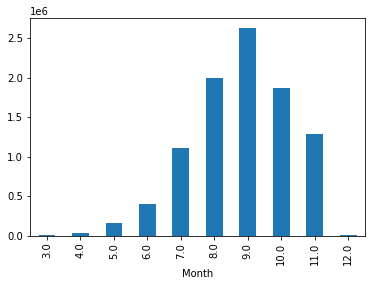

In [ ]:
M.plot.bar()
plt.show

# total male/female infected with coronavirus

In [ ]:
data.groupby('Gender')['Num Cases'].sum()

Gender
F             41630.0
Femal e           1.0
M             79072.0
M                 1.0
M,                1.0
Non-Binary       18.0
Name: Num Cases, dtype: float64

# which age group is infected most

In [ ]:
M=data.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=False).head(10)
M

Age Bracket
30.0    1925.0
30      1789.0
40.0    1723.0
35      1675.0
35.0    1641.0
40      1623.0
45.0    1599.0
32.0    1551.0
45      1546.0
25      1544.0
Name: Num Cases, dtype: float64

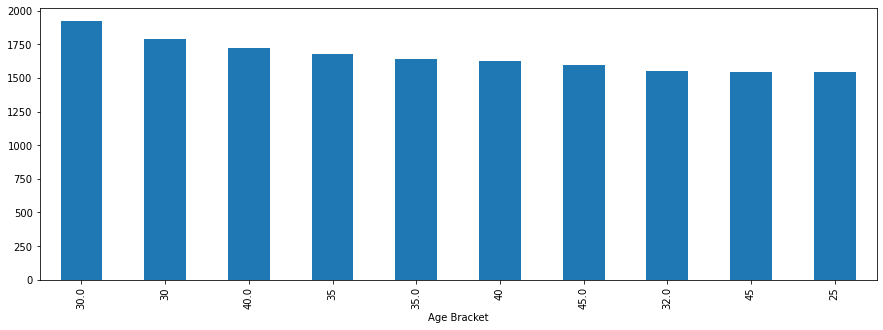

In [ ]:
M.plot.bar(figsize=(15,5))
plt.show()

# check state wise total cases in india

In [ ]:
M=data[data['Current Status']=='Hospitalized'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)
M

Detected State
Maharashtra                                 1823882.0
Karnataka                                    884825.0
Andhra Pradesh                               868062.0
Tamil Nadu                                   781908.0
Kerala                                       602922.0
Delhi                                        570370.0
Uttar Pradesh                                543879.0
West Bengal                                  483478.0
Odisha                                       319102.0
Telangana                                    270316.0
Rajasthan                                    268059.0
Chhattisgarh                                 237314.0
Bihar                                        235615.0
Haryana                                      234114.0
Assam                                        212776.0
Gujarat                                      209775.0
Madhya Pradesh                               206126.0
Punjab                                       152089.0
Jammu and Kas

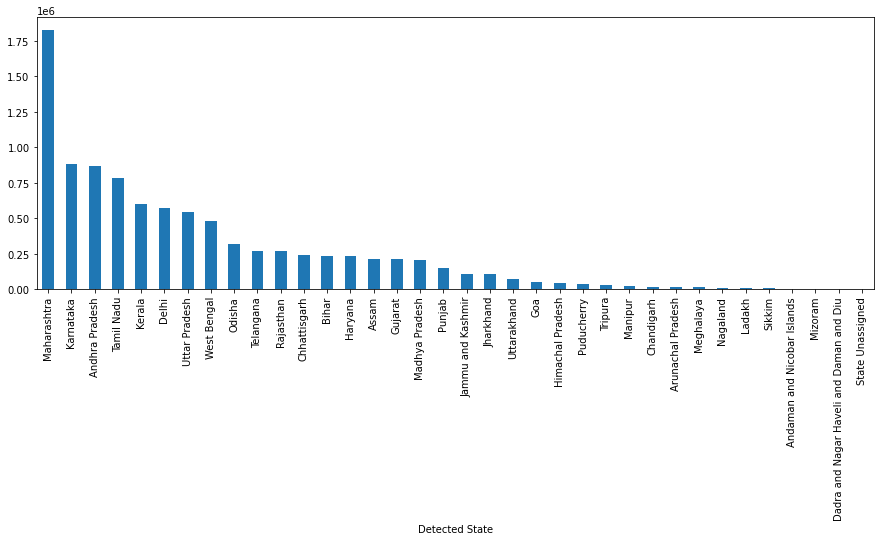

In [ ]:
M.plot.bar(figsize=(15,5))
plt.show()

# how many cases every day

In [ ]:
Day=data[data['Current Status']=='Hospitalized'].groupby(['Month','Day'])['Num Cases'].sum()
Day

Month  Day 
3.0    4.0         5.0
       5.0         1.0
       7.0         2.0
       9.0         4.0
       10.0        4.0
                ...   
11.0   27.0    41353.0
       28.0    41815.0
       29.0    39036.0
       30.0    31179.0
12.0   1.0       934.0
Name: Num Cases, Length: 271, dtype: float64

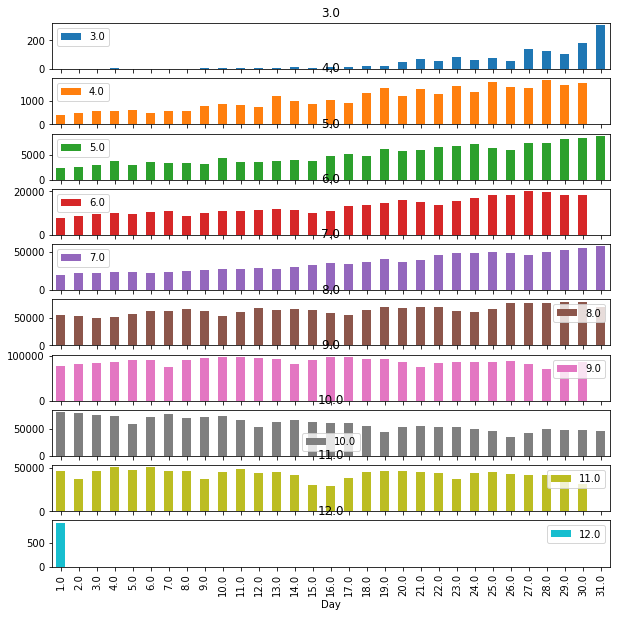

In [ ]:
Day.unstack(level=0).plot(kind='bar',subplots=True,figsize=(10,10))
plt.show()

In [ ]:
data['Current Status'].unique()

array(['Recovered', 'Hospitalized', 'Deceased', 'Migrated',
       'Migrated_Other', nan, 'Migrated_other'], dtype=object)

In [ ]:
data[data['Current Status']=='Deceased']['Num Cases'].sum()

136831.0

In [ ]:
data[data['Current Status']=='Deceased'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)

Detected State
Maharashtra                                 46820.0
Karnataka                                   11770.0
Tamil Nadu                                  11689.0
Delhi                                        9121.0
West Bengal                                  8407.0
Uttar Pradesh                                7732.0
Andhra Pradesh                               6961.0
Punjab                                       4791.0
Gujarat                                      3842.0
Madhya Pradesh                               3159.0
Chhattisgarh                                 2861.0
Haryana                                      2425.0
Rajasthan                                    2272.0
Kerala                                       2244.0
Odisha                                       1797.0
Jammu and Kashmir                            1689.0
Telangana                                    1437.0
Bihar                                        1263.0
Uttarakhand                                  1231